In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("diabetes_risk_prediction_dataset.csv")

In [3]:
data.head(5)

Age Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
0   40   Male       No        Yes                 No      Yes         No   
1   58   Male       No         No                 No      Yes         No   
2   41   Male      Yes         No                 No      Yes        Yes   
3   45   Male       No         No                Yes      Yes        Yes   
4   60   Male      Yes        Yes                Yes      Yes        Yes   

  Genital thrush visual blurring Itching Irritability delayed healing  \
0             No              No     Yes           No             Yes   
1             No             Yes      No           No              No   
2             No              No     Yes           No             Yes   
3            Yes              No     Yes           No             Yes   
4             No             Yes     Yes          Yes             Yes   

  partial paresis muscle stiffness Alopecia Obesity     class  
0              No              Yes      Yes     Yes  Positive  
1             Yes               No      Yes      No  Positive  
2              No              Yes      Yes      No  Positive  
3              No               No       No      No  Positive  
4             Yes              Yes      Yes     Yes  Positive

# Initial Observations

In [4]:
df = data.copy()

In [5]:
df.shape

(520, 17)

- So we have 16 features and 1 class. The column named "class" is the column that we are going to predict.
- We have both categorical and quantitive dtypes in our dataset.
- Most of the columns in our dataset is categorical.

# Data Preprocessing

## Null & Duplicate Handling

In [6]:
df.isna().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [7]:
df.duplicated().sum()

269

In [8]:
# We Don't have any null values in our dataset
# But we have duplicate values and we have to resolve them

In [9]:
df.drop_duplicates(keep="first", inplace = True)

In [10]:
df.duplicated().sum()

0

In [11]:
# So we have no duplicate values remaining in our dataset

## Encoding

In [12]:
df.dtypes

Age                    int64
Gender                object
Polyuria              object
Polydipsia            object
sudden weight loss    object
weakness              object
Polyphagia            object
Genital thrush        object
visual blurring       object
Itching               object
Irritability          object
delayed healing       object
partial paresis       object
muscle stiffness      object
Alopecia              object
Obesity               object
class                 object
dtype: object

In [13]:
df.nunique()

Age                   51
Gender                 2
Polyuria               2
Polydipsia             2
sudden weight loss     2
weakness               2
Polyphagia             2
Genital thrush         2
visual blurring        2
Itching                2
Irritability           2
delayed healing        2
partial paresis        2
muscle stiffness       2
Alopecia               2
Obesity                2
class                  2
dtype: int64

In [14]:
# As we can see, all of our columns with the dtype "object" is categorical

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
encoder = LabelEncoder()

In [17]:
for col_name in df.columns:
    if df[col_name].dtype == "object":
        df[col_name] = encoder.fit_transform(df[[col_name]])

In [18]:
df.dtypes

Age                   int64
Gender                int32
Polyuria              int32
Polydipsia            int32
sudden weight loss    int32
weakness              int32
Polyphagia            int32
Genital thrush        int32
visual blurring       int32
Itching               int32
Irritability          int32
delayed healing       int32
partial paresis       int32
muscle stiffness      int32
Alopecia              int32
Obesity               int32
class                 int32
dtype: object

In [19]:
# As we can see, all our columns are encoded successfully 

## Scaling

In [20]:
# We can scale the "age" column to make our model training more efficient

In [21]:
df.head(5)

Age  Gender  Polyuria  Polydipsia  sudden weight loss  weakness  \
0   40       1         0           1                   0         1   
1   58       1         0           0                   0         1   
2   41       1         1           0                   0         1   
3   45       1         0           0                   1         1   
4   60       1         1           1                   1         1   

   Polyphagia  Genital thrush  visual blurring  Itching  Irritability  \
0           0               0                0        1             0   
1           0               0                1        0             0   
2           1               0                0        1             0   
3           1               1                0        1             0   
4           1               0                1        1             1   

   delayed healing  partial paresis  muscle stiffness  Alopecia  Obesity  \
0                1                0                 1         1        1   
1                0                1                 0         1        0   
2                1                0                 1         1        0   
3                1                0                 0         0        0   
4                1                1                 1         1        1   

   class  
0      1  
1      1  
2      1  
3      1  
4      1

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()

In [24]:
df["Age"] = scaler.fit_transform(df[["Age"]])

In [25]:
df.head(5)

Age  Gender  Polyuria  Polydipsia  sudden weight loss  weakness  \
0 -0.709103       1         0           1                   0         1   
1  0.730775       1         0           0                   0         1   
2 -0.629110       1         1           0                   0         1   
3 -0.309137       1         0           0                   1         1   
4  0.890761       1         1           1                   1         1   

   Polyphagia  Genital thrush  visual blurring  Itching  Irritability  \
0           0               0                0        1             0   
1           0               0                1        0             0   
2           1               0                0        1             0   
3           1               1                0        1             0   
4           1               0                1        1             1   

   delayed healing  partial paresis  muscle stiffness  Alopecia  Obesity  \
0                1                0                 1         1        1   
1                0                1                 0         1        0   
2                1                0                 1         1        0   
3                1                0                 0         0        0   
4                1                1                 1         1        1   

   class  
0      1  
1      1  
2      1  
3      1  
4      1

In [26]:
# Our Age column is scaled successfully

# EDA

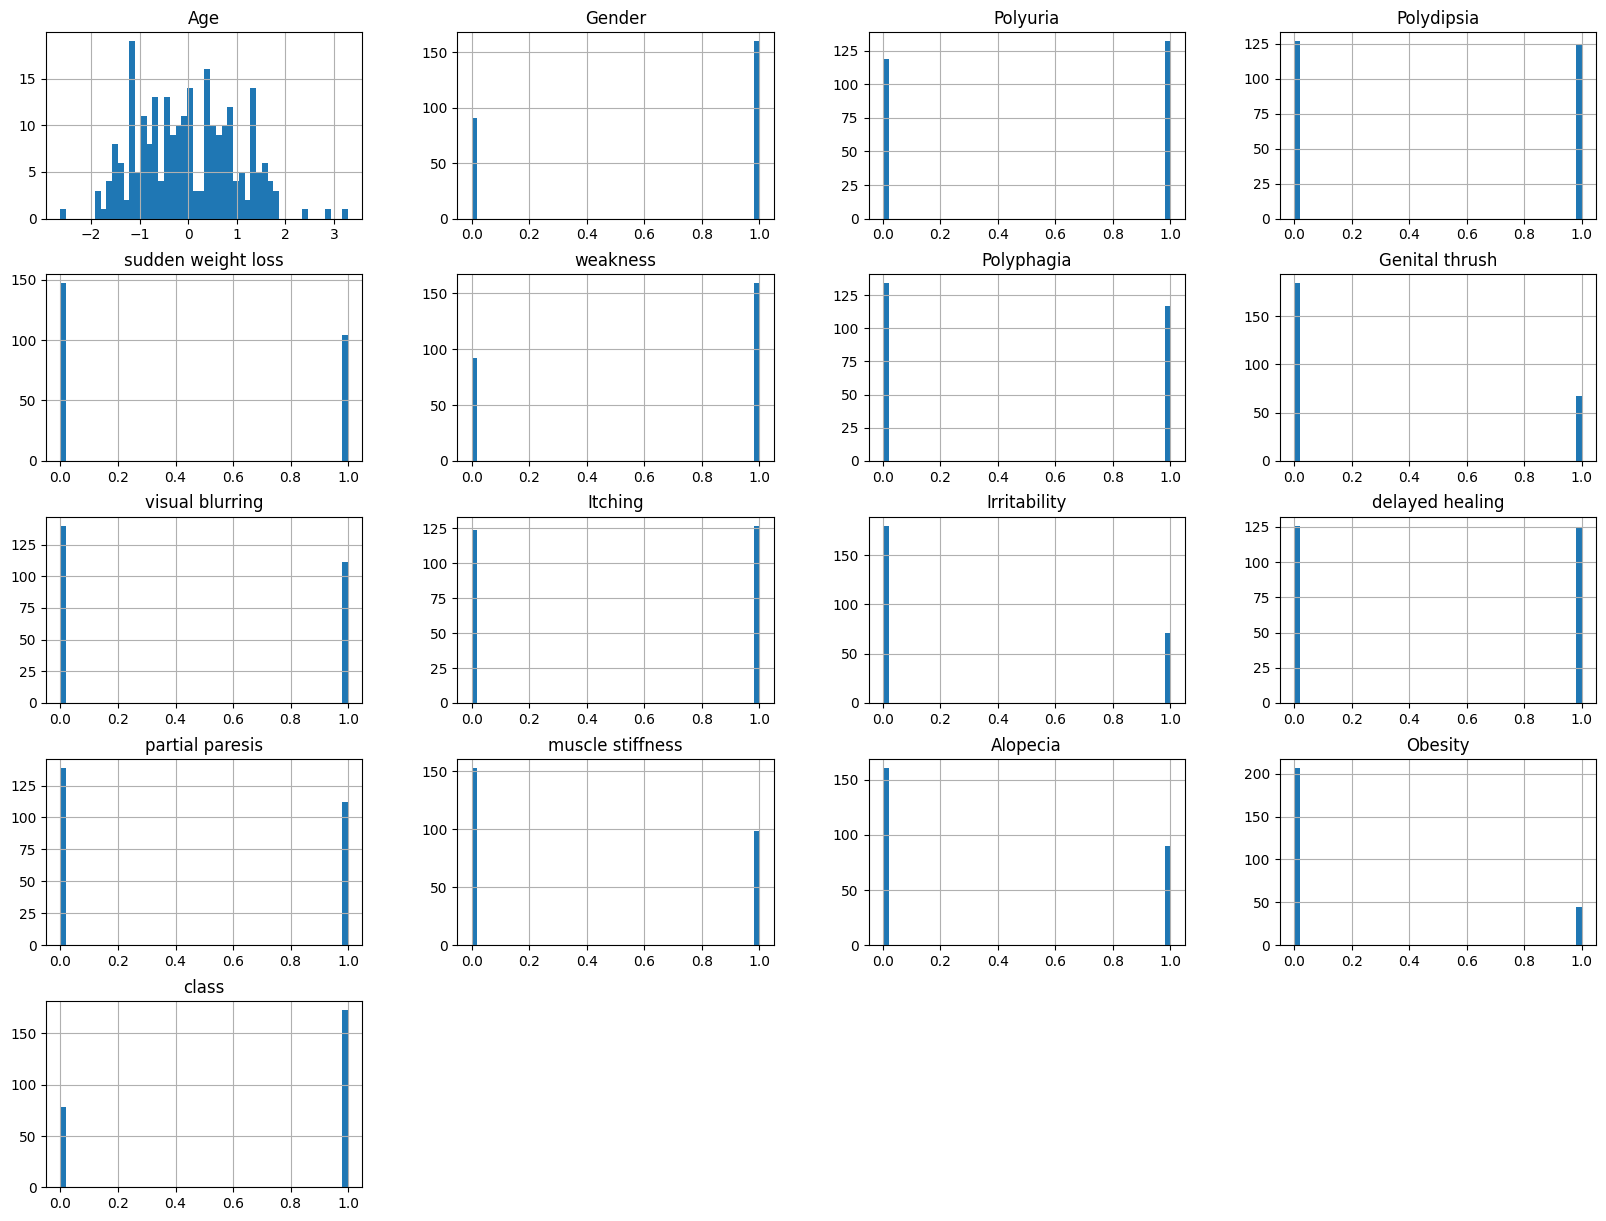

In [27]:
df.hist(bins=50, figsize = [20,15])
plt.show()

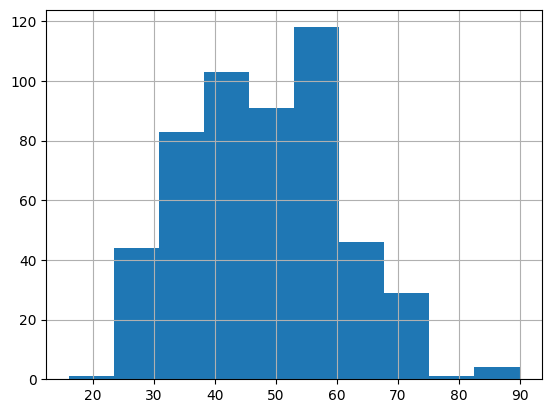

In [28]:
data["Age"].hist()
plt.show()

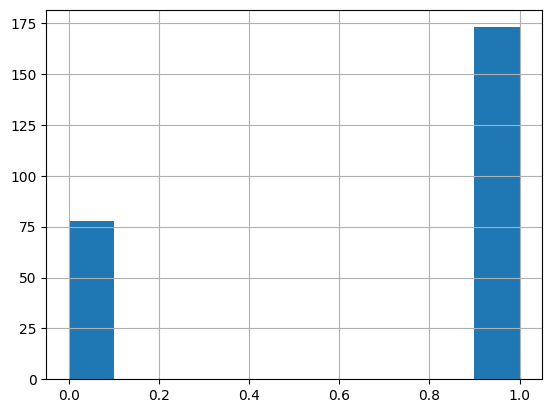

In [29]:
df["class"].hist()
plt.show()

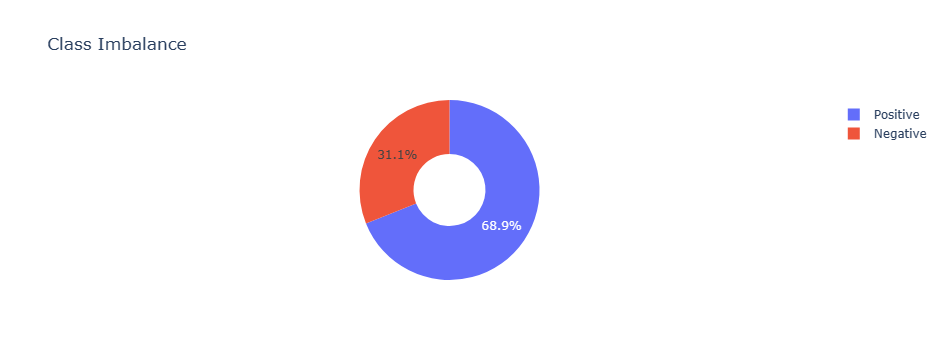

In [30]:
# Get pie chart slice labels
labels = ["Positive", "Negative"]

# Get pie chart slice values
values = df["class"].value_counts().to_numpy()
px.pie(values = values, names=labels, hole=0.4, title="Class Imbalance",width = 600)


In [31]:
# As we can see, there is class imbalance present in the column named "class"

# Train Test Split

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X = df.drop("class",axis = 1)

In [34]:
y = df["class"]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42) # Keeping 70% train data and 30% test data

In [36]:
X_train.head(5)

Age  Gender  Polyuria  Polydipsia  sudden weight loss  weakness  \
220 -0.869090       1         0           0                   0         0   
29   0.330809       1         1           1                   1         1   
128 -1.349049       1         0           1                   0         1   
143  0.330809       1         1           0                   1         0   
148 -0.389130       1         0           1                   0         0   

     Polyphagia  Genital thrush  visual blurring  Itching  Irritability  \
220           0               0                0        0             0   
29            1               0                1        0             1   
128           1               1                0        1             1   
143           0               0                0        0             0   
148           0               1                0        0             0   

     delayed healing  partial paresis  muscle stiffness  Alopecia  Obesity  
220                0                0                 0         0        0  
29                 0                1                 0         1        0  
128                0                0                 0         1        0  
143                1                1                 0         0        0  
148                1                0                 0         0        1

# Model Selection & Training

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
import sklearn.metrics as mt

In [38]:
# Initialize models
lr = LogisticRegression()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
ab = AdaBoostClassifier()
gb = GradientBoostingClassifier()
svc = SVC()
knn = KNeighborsClassifier()
nb = GaussianNB()

## Logistic Regression

In [39]:
lr.fit(X_train,y_train)

LogisticRegression()

In [40]:
# Train Score

In [41]:
mt.accuracy_score(y_train, lr.predict(X_train))

0.9142857142857143

In [42]:
# Test Score

In [43]:
mt.accuracy_score(y_test, lr.predict(X_test))

0.8421052631578947

## Decision Tree Classifier

In [44]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [45]:
#Train Score

In [46]:
mt.accuracy_score(y_train, dtc.predict(X_train))

1.0

In [47]:
# Test Score

In [48]:
mt.accuracy_score(y_test, dtc.predict(X_test))

0.8552631578947368

## Random Forest Classifier

In [49]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [50]:
#Train Score

In [51]:
mt.accuracy_score(y_train, rfc.predict(X_train))

1.0

In [52]:
# Test Score

In [53]:
mt.accuracy_score(y_test, rfc.predict(X_test))

0.9210526315789473

## ADA Boost Classifier

In [54]:
ab.fit(X_train,y_train)

AdaBoostClassifier()

In [55]:
#Train Score

In [56]:
mt.accuracy_score(y_train, ab.predict(X_train))

0.9428571428571428

In [57]:
# Test Score

In [58]:
mt.accuracy_score(y_test, ab.predict(X_test))

0.8289473684210527

## Gradient Boost Classifier

In [59]:
gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [60]:
#Train Score

In [61]:
mt.accuracy_score(y_train, gb.predict(X_train))

1.0

In [62]:
# Test Score

In [63]:
mt.accuracy_score(y_test, gb.predict(X_test))

0.881578947368421

## Support Vector Classifier

In [64]:
svc.fit(X_train,y_train)

SVC()

In [65]:
#Train Score

In [66]:
mt.accuracy_score(y_train, svc.predict(X_train))

0.9714285714285714

In [67]:
# Test Score

In [68]:
mt.accuracy_score(y_test, svc.predict(X_test))

0.9342105263157895

## K Nearest Classifier

In [69]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [70]:
#Train Score

In [71]:
mt.accuracy_score(y_train, knn.predict(X_train))

0.9142857142857143

In [72]:
# Test Score

In [73]:
mt.accuracy_score(y_test, knn.predict(X_test))

0.9210526315789473

## Gaussian Naive Bayes

In [74]:
nb.fit(X_train,y_train)

GaussianNB()

In [75]:
#Train Score

In [76]:
mt.accuracy_score(y_train, nb.predict(X_train))

0.8971428571428571

In [77]:
# Test Score

In [78]:
mt.accuracy_score(y_test, nb.predict(X_test))

0.8947368421052632

# Model Evaluation

## Accuracy Score

In [79]:
model_names = ['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier', 'AdaBoostClassifier', 'GradientBoostingClassifier', 'SVC',
          ' KNeighborsClassifier',
          'GaussianNB']

train_accuracy = [mt.accuracy_score(y_train, lr.predict(X_train)),
                  mt.accuracy_score(y_train, dtc.predict(X_train)),
                  mt.accuracy_score(y_train, rfc.predict(X_train)),
                  mt.accuracy_score(y_train, ab.predict(X_train)),
                  mt.accuracy_score(y_train, gb.predict(X_train)),
                  mt.accuracy_score(y_train, svc.predict(X_train)),
                  mt.accuracy_score(y_train, knn.predict(X_train)),
                  mt.accuracy_score(y_train, nb.predict(X_train))]

test_accuracy = [mt.accuracy_score(y_test, lr.predict(X_test)),
                  mt.accuracy_score(y_test, dtc.predict(X_test)),
                  mt.accuracy_score(y_test, rfc.predict(X_test)),
                  mt.accuracy_score(y_test, ab.predict(X_test)),
                  mt.accuracy_score(y_test, gb.predict(X_test)),
                  mt.accuracy_score(y_test, svc.predict(X_test)),
                  mt.accuracy_score(y_test, knn.predict(X_test)),
                  mt.accuracy_score(y_test, nb.predict(X_test))]

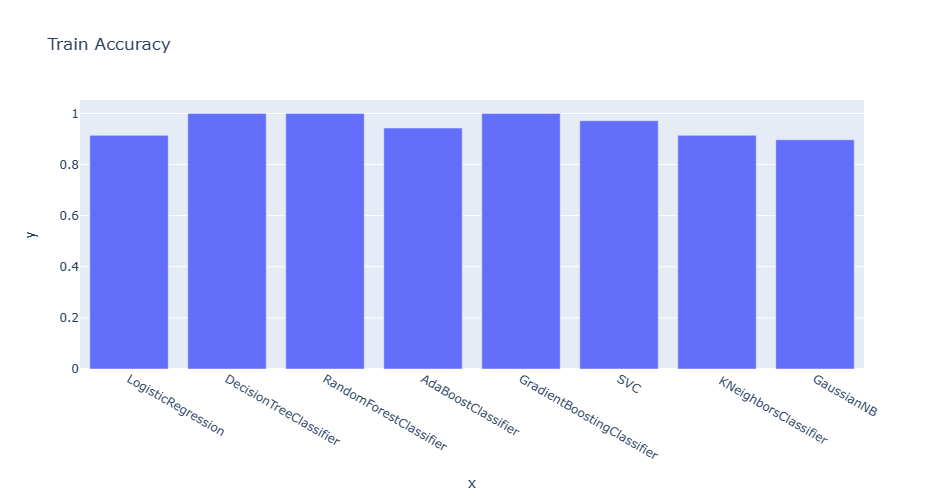

In [80]:
fig = px.bar(x = model_names,y = train_accuracy, height = 500, width = 800, title = "Train Accuracy")
fig.show()

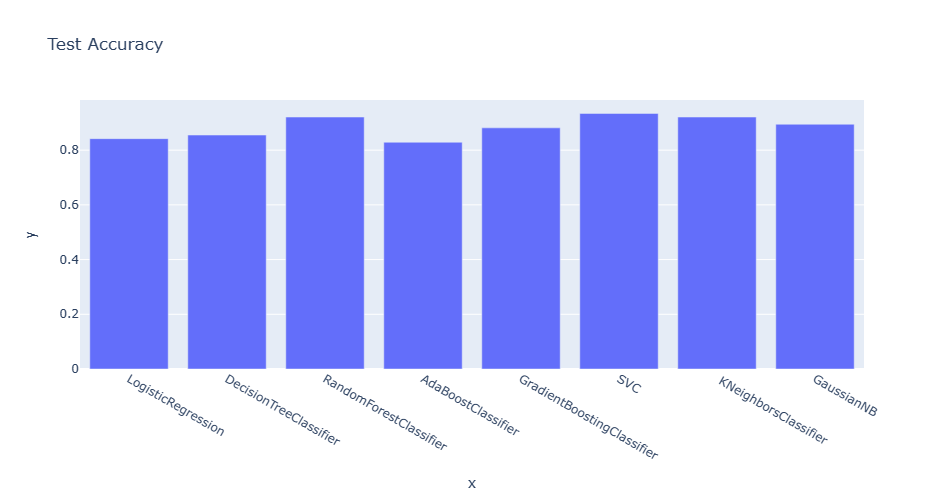

In [81]:
fig = px.bar(x = model_names,y = test_accuracy, height = 500, width = 800, title = "Test Accuracy")
fig.show()

In [82]:
# From the above two charts, we can see that RandomForestClassifier performs better overall than other models that we have tested. RFC scored 100% on the 
# train data and around 92% on the test data. The closest model in terms of accuracy is SVC which falls a little short of RFC in the training accuracy with 97%.

## Classification Report

In [83]:
print(mt.classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.63      0.74        27
           1       0.82      0.96      0.89        49

    accuracy                           0.84        76
   macro avg       0.86      0.79      0.81        76
weighted avg       0.85      0.84      0.83        76



In [84]:
print(mt.classification_report(y_test, dtc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79        27
           1       0.88      0.90      0.89        49

    accuracy                           0.86        76
   macro avg       0.84      0.84      0.84        76
weighted avg       0.85      0.86      0.85        76



In [85]:
print(mt.classification_report(y_test, rfc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        27
           1       0.92      0.96      0.94        49

    accuracy                           0.92        76
   macro avg       0.92      0.91      0.91        76
weighted avg       0.92      0.92      0.92        76



In [86]:
print(mt.classification_report(y_test, ab.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.67      0.73        27
           1       0.83      0.92      0.87        49

    accuracy                           0.83        76
   macro avg       0.83      0.79      0.80        76
weighted avg       0.83      0.83      0.82        76



In [87]:
print(mt.classification_report(y_test, gb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.88      0.94      0.91        49

    accuracy                           0.88        76
   macro avg       0.88      0.86      0.87        76
weighted avg       0.88      0.88      0.88        76



In [88]:
print(mt.classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90        27
           1       0.92      0.98      0.95        49

    accuracy                           0.93        76
   macro avg       0.94      0.92      0.93        76
weighted avg       0.94      0.93      0.93        76



In [89]:
print(mt.classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90        27
           1       0.98      0.90      0.94        49

    accuracy                           0.92        76
   macro avg       0.91      0.93      0.92        76
weighted avg       0.93      0.92      0.92        76



In [90]:
print(mt.classification_report(y_test, nb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        27
           1       0.92      0.92      0.92        49

    accuracy                           0.89        76
   macro avg       0.89      0.89      0.89        76
weighted avg       0.89      0.89      0.89        76



In [91]:
precisions = [mt.precision_score(y_test, lr.predict(X_test)),
              mt.precision_score(y_test, dtc.predict(X_test)),
              mt.precision_score(y_test, rfc.predict(X_test)),
              mt.precision_score(y_test, ab.predict(X_test)),
              mt.precision_score(y_test, gb.predict(X_test)),
              mt.precision_score(y_test, svc.predict(X_test)),
              mt.precision_score(y_test, knn.predict(X_test)),
              mt.precision_score(y_test, nb.predict(X_test))]

recalls = [mt.recall_score(y_test, lr.predict(X_test)),
           mt.recall_score(y_test, dtc.predict(X_test)),
           mt.recall_score(y_test, rfc.predict(X_test)),
           mt.recall_score(y_test, ab.predict(X_test)),
           mt.recall_score(y_test, gb.predict(X_test)),
           mt.recall_score(y_test, svc.predict(X_test)),
           mt.recall_score(y_test, knn.predict(X_test)),
           mt.recall_score(y_test, nb.predict(X_test)),]

f1_scores = [mt.f1_score(y_test, lr.predict(X_test)),
             mt.recall_score(y_test, dtc.predict(X_test)),
             mt.recall_score(y_test, rfc.predict(X_test)),
             mt.recall_score(y_test, ab.predict(X_test)),
             mt.recall_score(y_test, gb.predict(X_test)),
             mt.recall_score(y_test, svc.predict(X_test)),
             mt.recall_score(y_test, knn.predict(X_test)),
             mt.recall_score(y_test, nb.predict(X_test)),]

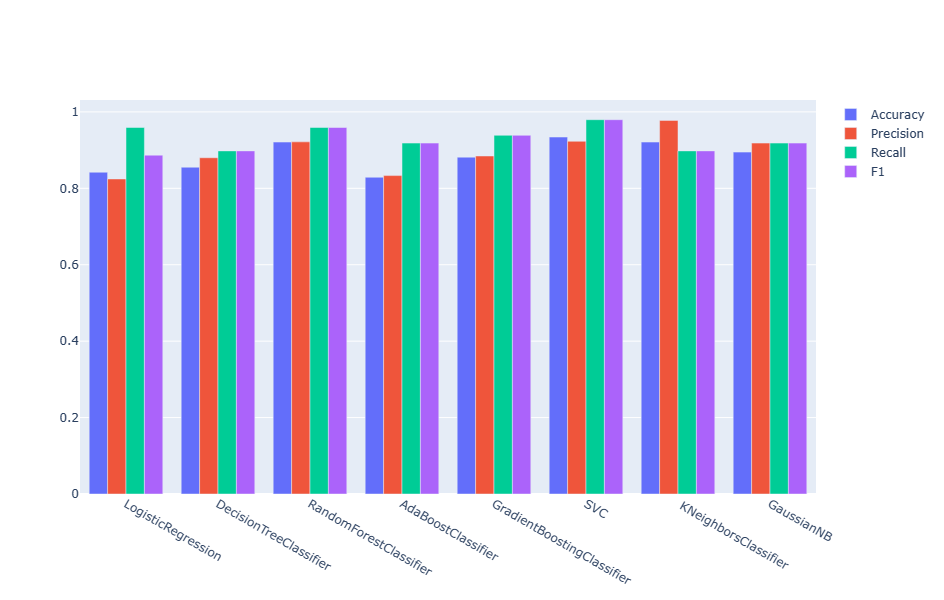

In [115]:
# Visualizing Precision, Recall and F1
import plotly.graph_objects as go
fig = go.Figure(data=[
    go.Bar(name='Accuracy', x=model_names, y=test_accuracy),
    go.Bar(name='Precision', x=model_names, y=precisions),
    go.Bar(name='Recall', x=model_names, y=recalls),
    go.Bar(name='F1', x=model_names, y=f1_scores)
])
# Change the bar mode
fig.update_layout(barmode='group',height = 600, width = 1200)
fig.show()

In [93]:
# If we analyze the above graph, we can see that the overall best performer is SVC with excellent Accuracy, Precision, Recall and F1 score

## Confusion Matrix

In [94]:
mt.confusion_matrix(y_test,lr.predict(X_test))

array([[17, 10],
       [ 2, 47]], dtype=int64)

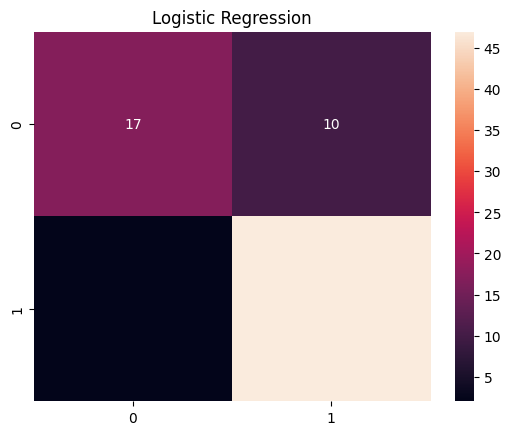

In [95]:
sns.heatmap(mt.confusion_matrix(y_test,lr.predict(X_test)),annot = True)
plt.title("Logistic Regression")
plt.show()

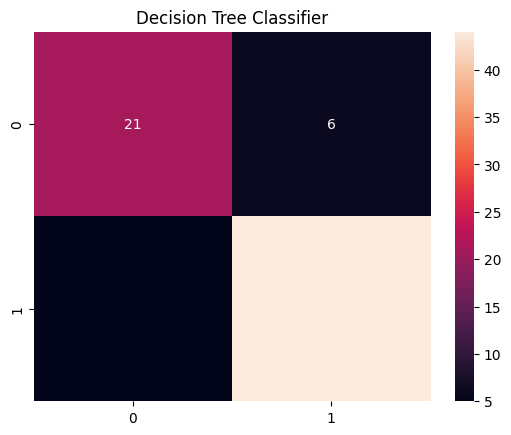

In [96]:
sns.heatmap(mt.confusion_matrix(y_test, dtc.predict(X_test)),annot = True)
plt.title("Decision Tree Classifier")
plt.show()

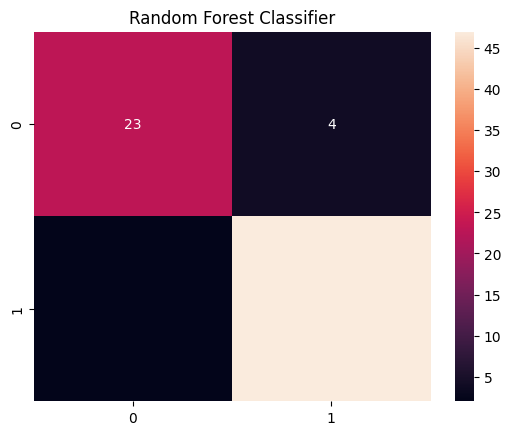

In [97]:
sns.heatmap(mt.confusion_matrix(y_test, rfc.predict(X_test)),annot = True,fmt = "d")
plt.title("Random Forest Classifier")
plt.show()

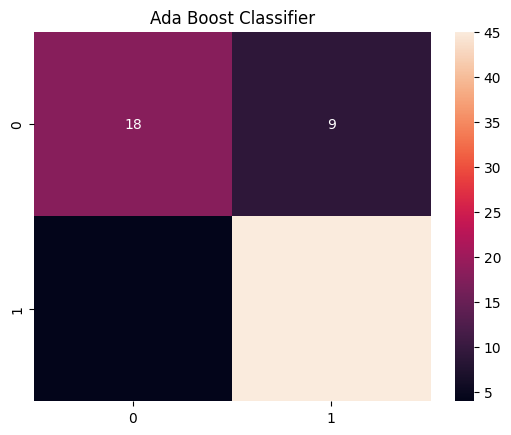

In [98]:
sns.heatmap(mt.confusion_matrix(y_test, ab.predict(X_test)),annot = True,fmt = "d")
plt.title("Ada Boost Classifier")
plt.show()

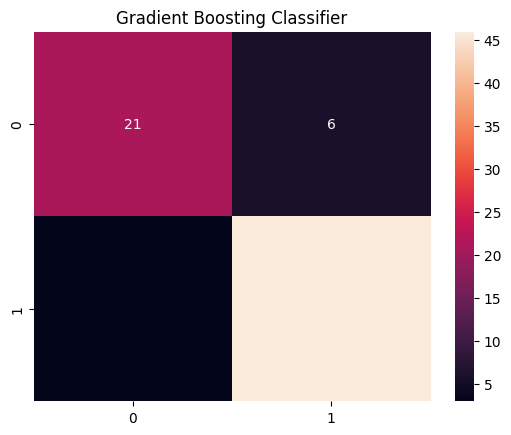

In [99]:
sns.heatmap(mt.confusion_matrix(y_test, gb.predict(X_test)),annot = True,fmt = "d")
plt.title("Gradient Boosting Classifier")
plt.show()

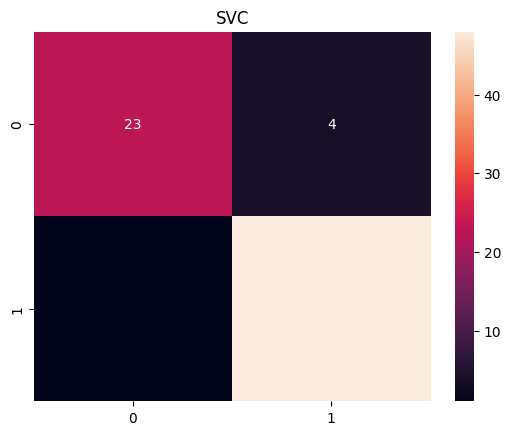

In [100]:
sns.heatmap(mt.confusion_matrix(y_test, svc.predict(X_test)),annot = True,fmt = "d")
plt.title("SVC")
plt.show()

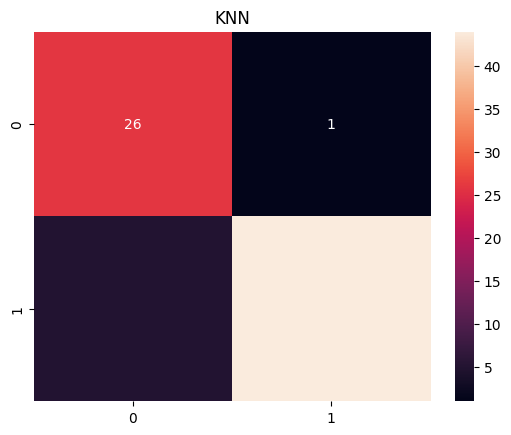

In [101]:
sns.heatmap(mt.confusion_matrix(y_test, knn.predict(X_test)),annot = True,fmt = "d")
plt.title("KNN")
plt.show()

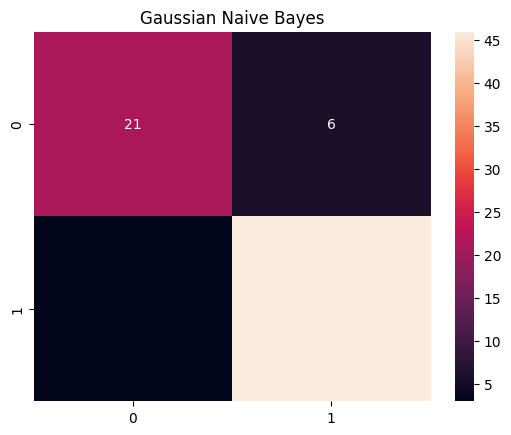

In [102]:
sns.heatmap(mt.confusion_matrix(y_test, gb.predict(X_test)),annot = True,fmt = "d")
plt.title("Gaussian Naive Bayes")
plt.show()

## ROC AUC Curve

In [103]:
# lr = LogisticRegression()
# dtc = DecisionTreeClassifier()
# rfc = RandomForestClassifier()
# ab = AdaBoostClassifier()
# gb = GradientBoostingClassifier()
# svc = SVC()
# knn = KNeighborsClassifier()
# nb = GaussianNB()

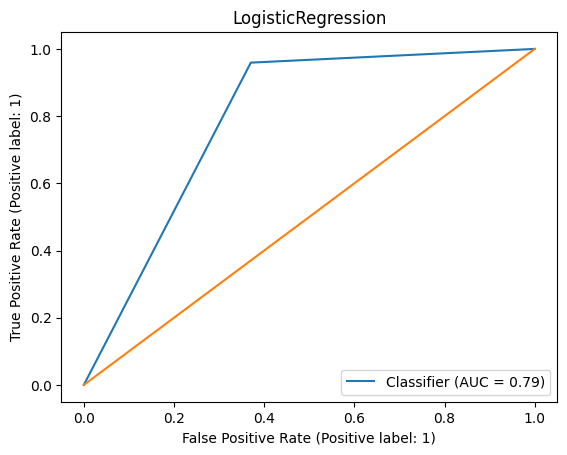

In [104]:
mt.RocCurveDisplay.from_predictions(y_test, lr.predict(X_test))
plt.plot([0,1],[0,1])
plt.title("LogisticRegression")
plt.show()

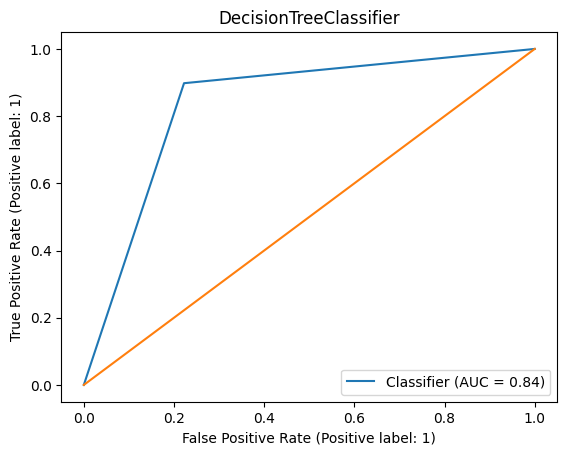

In [105]:
mt.RocCurveDisplay.from_predictions(y_test, dtc.predict(X_test))
plt.plot([0,1],[0,1])
plt.title("DecisionTreeClassifier")
plt.show()

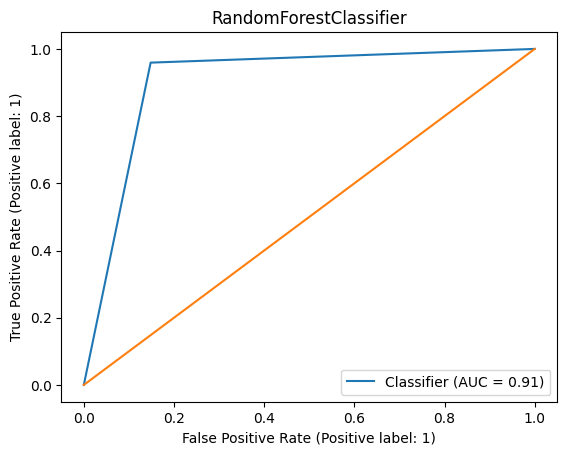

In [106]:
mt.RocCurveDisplay.from_predictions(y_test, rfc.predict(X_test))
plt.plot([0,1],[0,1])
plt.title("RandomForestClassifier")
plt.show()

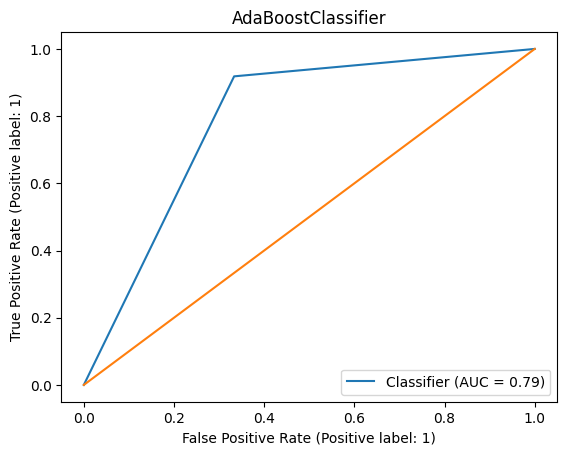

In [107]:
mt.RocCurveDisplay.from_predictions(y_test, ab.predict(X_test))
plt.plot([0,1],[0,1])
plt.title("AdaBoostClassifier")
plt.show()

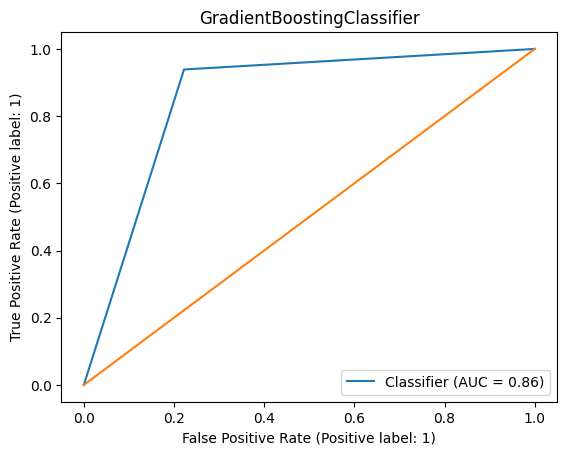

In [108]:
mt.RocCurveDisplay.from_predictions(y_test, gb.predict(X_test))
plt.plot([0,1],[0,1])
plt.title("GradientBoostingClassifier")
plt.show()

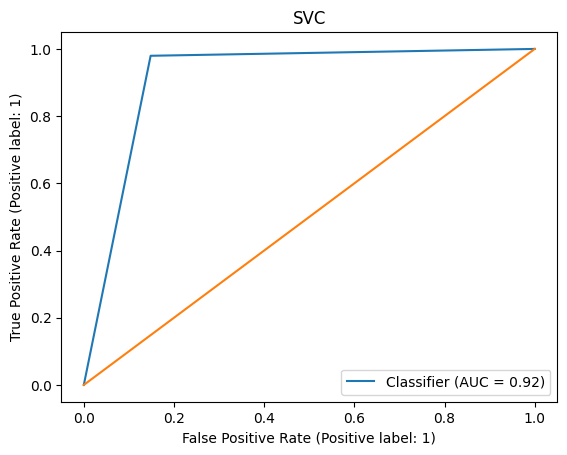

In [109]:
mt.RocCurveDisplay.from_predictions(y_test, svc.predict(X_test))
plt.plot([0,1],[0,1])
plt.title("SVC")
plt.show()

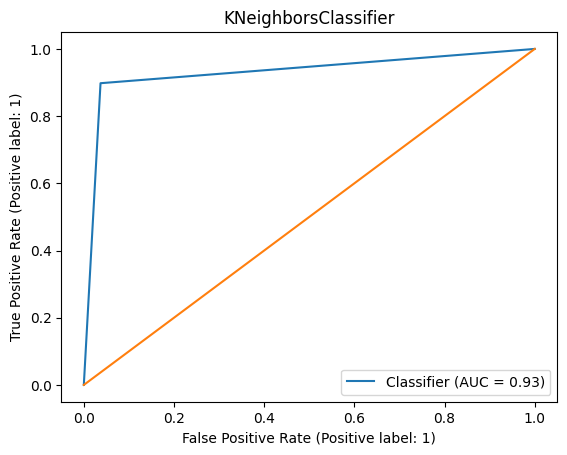

In [110]:
mt.RocCurveDisplay.from_predictions(y_test, knn.predict(X_test))
plt.plot([0,1],[0,1])
plt.title("KNeighborsClassifier")
plt.show()

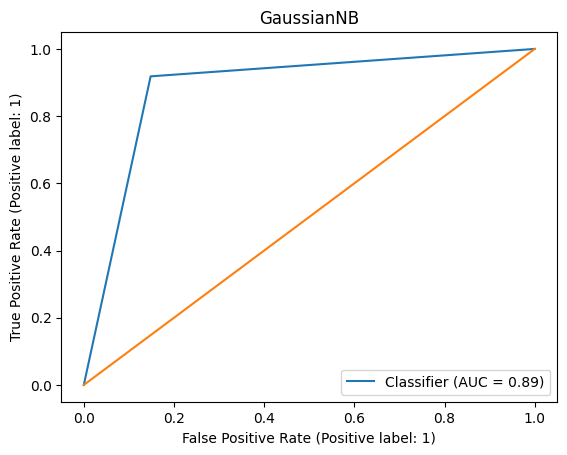

In [111]:
mt.RocCurveDisplay.from_predictions(y_test, nb.predict(X_test))
plt.plot([0,1],[0,1])
plt.title("GaussianNB")
plt.show()

In [112]:
# In the Roc Auc Curve, the KNN classifier performed best with 93% coverage closely followed by SVC(92%) and Random Forest Classifier(91%)

# Summery

In overall, RandomForestClassifier, KNN Classifier and SVC perfomerd well in all of the evaluation metrics. *SVC* performed the best of these three models. But point to be noted that we had to drop a lot of duplicate rows which made our sample size even shorter. So, *cross validation* methods can be used to evaluate the models more precisely. Class imbalance was also present in the dataset. So, resolving that issue using *sampling* techniques is advisable for future work. *Tuning the hyperparameters* can also be done for improving model accuracy.